# Introduction

This notebook is designed for people who want to solve binary classification problems using Python. By the end of this notebook, you will have the necessary skills and techniques required to solve such problems.

# Expectation from the Notebook

This notebook is divided into the below sections:

1.Introduction to the problem.

2.Exploratory Data Analysis (EDA) and PreProcessing.

3.Feature engineering and Model building.

# Table of Contents

Let’s look at the steps that we will follow in this notebook.

1.Problem Statement

2.Hypothesis Generation

3.Loading the data

4.Understanding the data

5.Exploratory Data Analysis (EDA)

6.Missing value and outlier treatment

7.Feature Engineering

8.Model Building :
    
i)Logistic Regression


# Problem Statement

Home Loan Prediction

# About The Data:





Given below is the description for each variable.




Variable ----- Description

Loan_ID -->> Unique Loan ID

Gender -->> Male/ Female

Married -->> Applicant married (Y/N)

Dependents -->> Number of dependents

Education -->> Applicant Education (Graduate/ Under Graduate)

Self_Employed -->> Self employed (Y/N)

ApplicantIncome -->> Applicant income

CoapplicantIncome -->> Coapplicant income

LoanAmount -->>  Loan amount in thousands

Loan_Amount_Term -->> Term of loan in months

Credit_History -->> credit history meets guidelines

Property_Area -->> Urban/ Semi Urban/ Rural

Loan_Status -->> Loan approved (Y/N)

# Import required packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data

 For this practice problem, we have been given two CSV files: train and test.

Train file will be used for training the model, i.e. our model will learn from this file. It contains all the independent variables and the target variable.

Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.

# Read Train and Test Data

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Copy of original data

Let’s make a copy of train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.

In [ ]:
train_original = train.copy()
test_original = test.copy()

# Understanding the Data

In this section, we will look at the structure of the train and test datasets. Firstly, we will check the features present in our data and then we will look at their data types.

In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have 12 independent variables and 1 target variable, i.e. Loan_Status in the train dataset. Let’s also have a look at the columns of test dataset.

In [ ]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We have similar features in the test dataset as the train dataset except the Loan_Status. We will predict the Loan_Status using the model that we will build using the train data.

# Print the data types

In [ ]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see there are three format of data types:


object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status.

int64: It represents the integer variables. ApplicantIncome is of this format.

float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History.

# Shape of the dataset

In [ ]:
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print('Test data shape: ', test.shape)
test.head()

Test data shape:  (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in test dataset.

# Exploratory Data Analysis (EDA)

# Target Variable

We will first look at the target variable, i.e., Loan_Status.

As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable will give us the count of each category in that variable.

In [ ]:
#train["Loan_Status"].size
train["Loan_Status"].count()

614

Size of our target variable is : 614

In [ ]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Among 614 Loan_Status :
Accepted : 422 
Rejected : 192

In [ ]:
# Normalize can be set to True to print proportions instead of number 
train["Loan_Status"].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

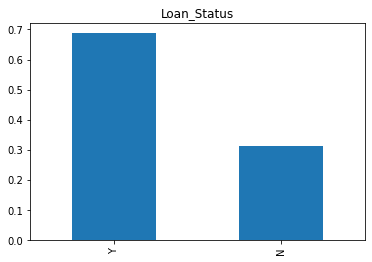

In [ ]:
train["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status')

The loan of 422(around 69%) people out of 614 was approved.

Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

# Independent Variable (Categorical)

# Analysis on "Gender" variable :

In [ ]:
train["Gender"].count()

601

Size of our "Gender" variable is : 614

In [ ]:
train["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Among 601 person: 
Male : 489 
Female : 112

In [ ]:
train['Gender'].value_counts(normalize=True)*100

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

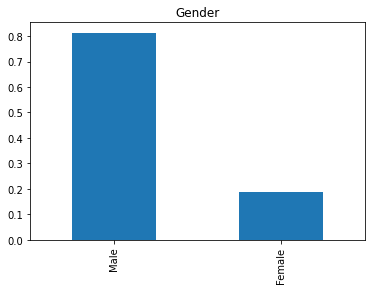

In [ ]:
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

In our train dataset the "Gender" variable contain
Male : 81%
Female: 19%     

# Analysis on "Married" variable :

In [ ]:
train["Married"].count()

611

Size of our "Married" variable is : 611

In [ ]:
train["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

Total number of people : 611

Married : 398

Unmarried : 213    

In [ ]:
train['Married'].value_counts(normalize=True)*100

Yes    65.139116
No     34.860884
Name: Married, dtype: float64

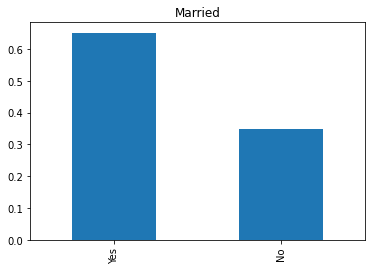

In [ ]:
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

From the Grapch we see that :

Number of married people : 65%

Number of unmarried people : 35%    

# Analysis on "Self_Employed" variable : 

In [ ]:
train["Self_Employed"].count()

582

Size of our "Self_Employed" variable is : 582

In [ ]:
train["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Total number of people : 582

Self_Employed : 82

Not_Self_Employed : 500

In [ ]:
train['Self_Employed'].value_counts(normalize=True)*100

No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64

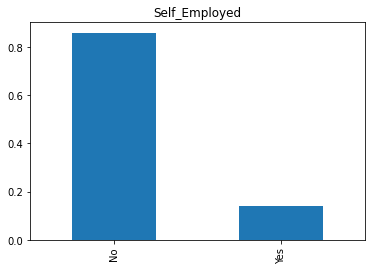

In [ ]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

Among 582 people only 14% are Self_Employed and rest of the 86% are Not_Self_Employed

# Analysis on "Credit_History" variable :

In [ ]:
train["Credit_History"].count()

564

Size of our "Credit_History" variable is : 564

In [ ]:
train["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Total number of debts : 564

Repaid Debts : 475

Not Repaid Debts : 89    

In [ ]:
train['Credit_History'].value_counts(normalize=True)*100

1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64

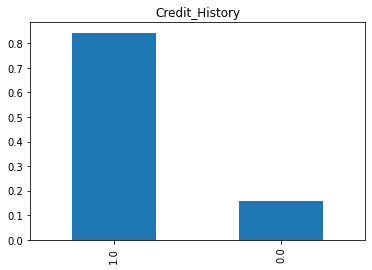

In [ ]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')


Around 84% applicants have repaid their debts.

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

# Independent Variable (Ordinal)

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

# Analysis on "Dependents" variable :

In [ ]:
train['Dependents'].count()

599

Size of our "Dependents" variable is : 599

In [ ]:
train["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Number of 0 Dependent : 345

Number of 1 Dependent : 102

Number of 2 Dependesnt : 101

Number of 3+ Dependent : 51

In [ ]:
train['Dependents'].value_counts(normalize=True)*100

0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64

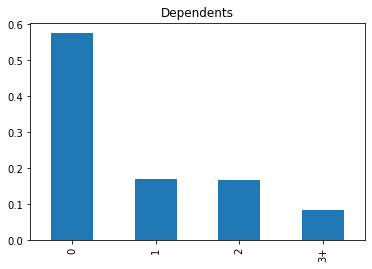

In [ ]:
train['Dependents'].value_counts(normalize=True).plot.bar(title="Dependents")

58% people have 0 dependent

17% people have 1 dependent

17% people have 2 dependent

8% people have 3+ dependent

# Analysis on "Education" variable :

In [ ]:
train["Education"].count()

614

Size of Education variable : 614

In [ ]:
train["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

People who are Graduated : 480

People who are not Graduated : 134

In [ ]:
train["Education"].value_counts(normalize=True)*100

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

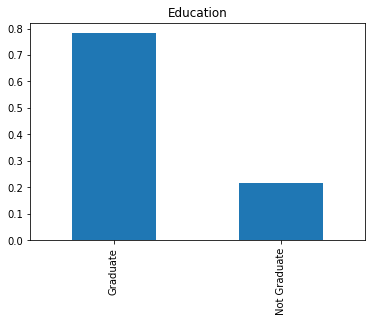

In [ ]:
train["Education"].value_counts(normalize=True).plot.bar(title = "Education")

Total number of People : 614

78% are Graduated and 22% are not Graduated

# Analysis on "Property_Area" variable :

In [ ]:
train["Property_Area"].count()

614

Size of "Property_Area" variable : 614

In [ ]:
train["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Total number of People : 614

People from Semiurban area : 233

People from Urban area : 202

People from Rural area : 179
    

In [ ]:
train["Property_Area"].value_counts(normalize=True)*100

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

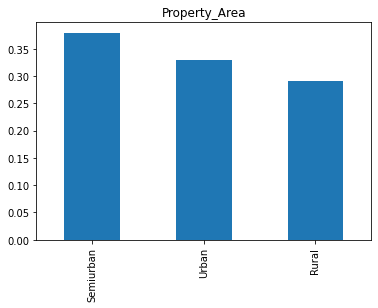

In [ ]:
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")

38% people from Semiurban area

33% people from Urban area

29% people from Rural area

# Independent Variable (Numerical)

Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

# "ApplicantIncome" distribution :

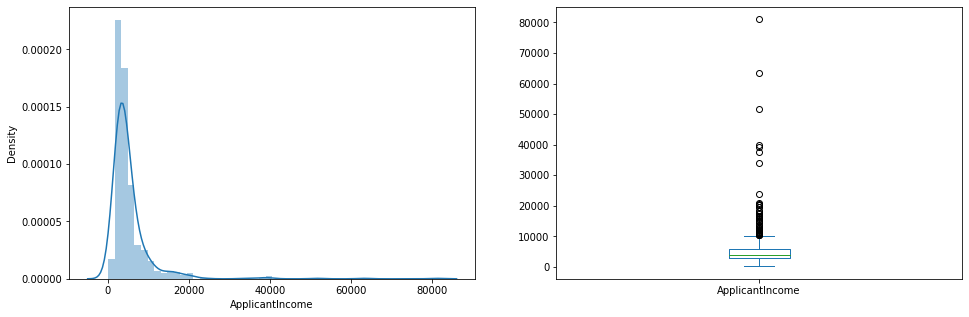

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["ApplicantIncome"]);

plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.

Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

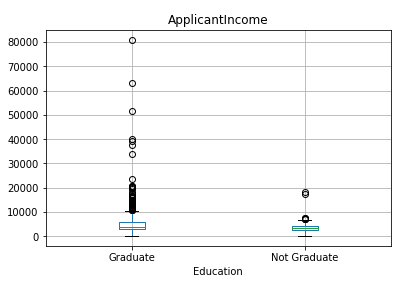

In [ ]:
train.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

# Let’s look at the "CoapplicantIncome" distribution:


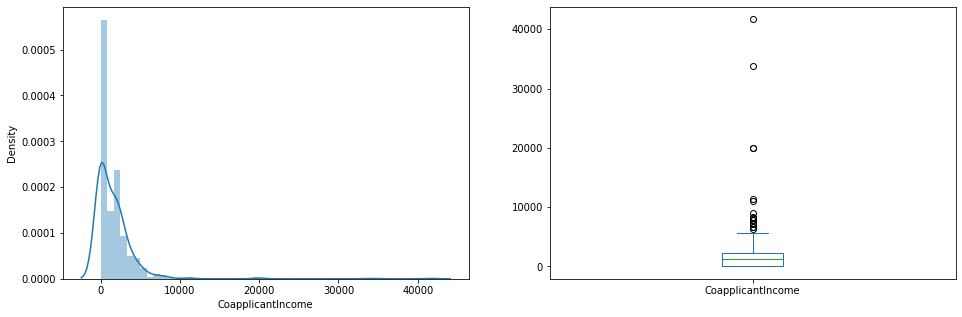

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["CoapplicantIncome"]);

plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

# Let’s look at the distribution of "LoanAmount" variable :

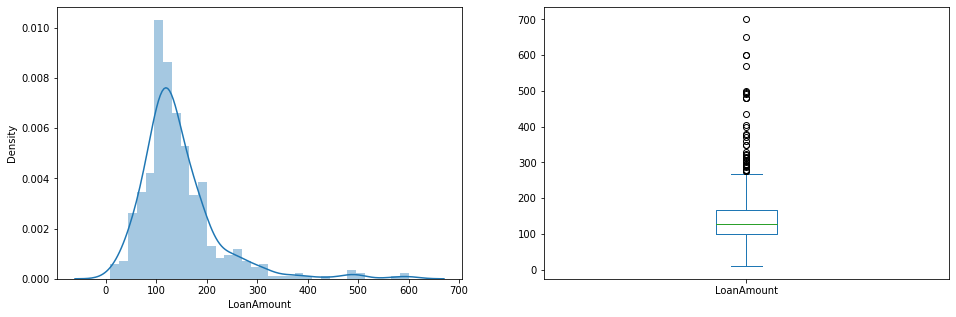

In [ ]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

# distribution of "LoanAmountTerm" variable :

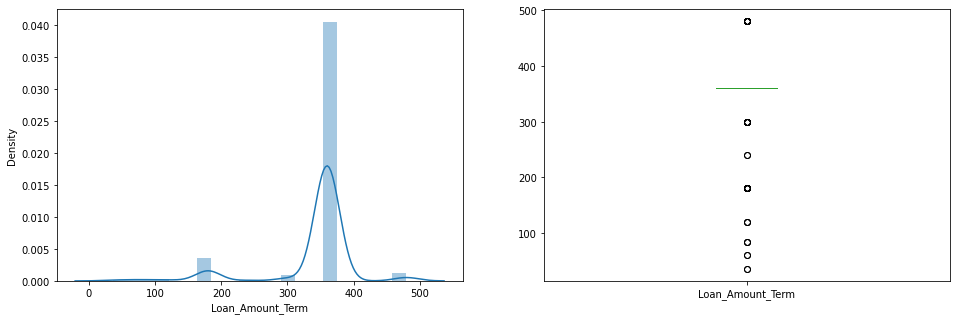

In [ ]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df["Loan_Amount_Term"]);

plt.subplot(122)
df["Loan_Amount_Term"].plot.box(figsize=(16,5))
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

# Missing Value and Outlier Treatment

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

# Missing value imputation

Let’s list out feature-wise count of missing values.

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

For numerical variables: imputation using mean or median
    
For categorical variables: imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features

In [ ]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train['Dependents'].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. 
We will look at the value count of the Loan amount term variable.

In [ ]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most.
So we will replace the missing values in this variable using the mode of this variable.

In [ ]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)

In [ ]:
train["Loan_Amount_Term"].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values.

We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [ ]:
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

Now lets check whether all the missing values are filled in the dataset.

In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the train dataset.

Let’s fill all the missing values in the test dataset too with the same approach

In [ ]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test['Dependents'].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)

In [ ]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

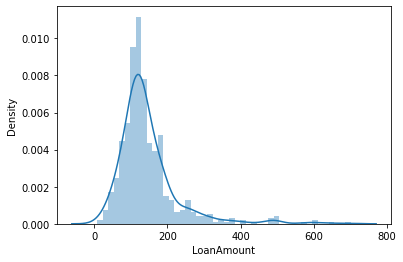

In [ ]:
sns.distplot(train["LoanAmount"]);

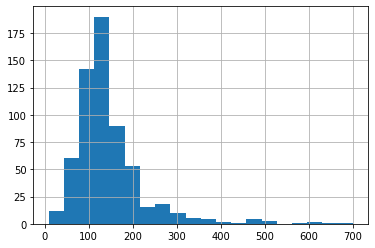

In [ ]:
train['LoanAmount'].hist(bins=20)

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness.

One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. 

So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. 

We will do the similar changes to the test file simultaneously.

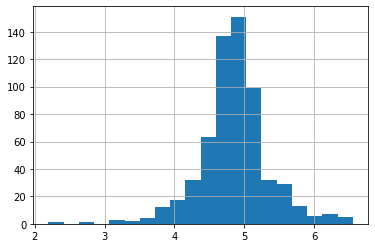

In [ ]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

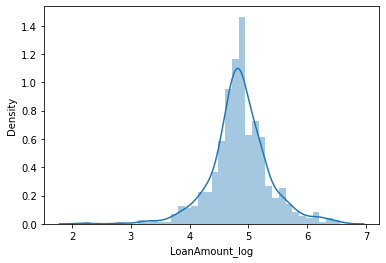

In [ ]:
sns.distplot(train["LoanAmount_log"])

Let's have a look in test set [LoanAmount]

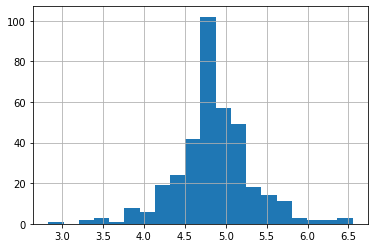

In [ ]:
test["LoanAmount_log"]=np.log(train["LoanAmount"])
test['LoanAmount_log'].hist(bins=20)

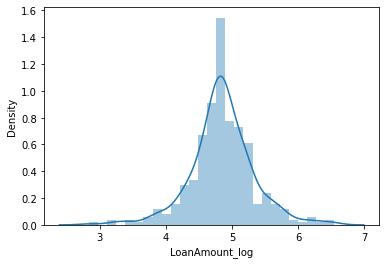

In [ ]:
sns.distplot(test["LoanAmount_log"])

# Feature Engineering

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [ ]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

Just have a look of train dataset  "TotalIncome"

In [ ]:
train[["TotalIncome"]].head()

,TotalIncome
0,5849.0
1,6091.0
2,3000.0
3,4941.0
4,6000.0


In [ ]:
test["TotalIncome"]=test["ApplicantIncome"]+test["CoapplicantIncome"]

Just have a look of test dataset "TotalIncome"

In [ ]:
test[["TotalIncome"]].head()

,TotalIncome
0,5720
1,4576
2,6800
3,4886
4,3276


Let’s check the distribution of train dataset Total Income.

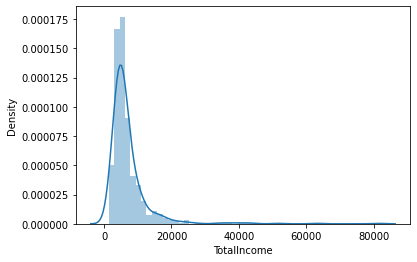

In [ ]:
sns.distplot(train["TotalIncome"])

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

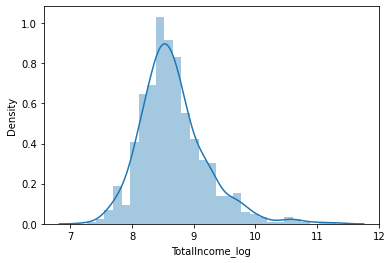

In [ ]:
train["TotalIncome_log"]=np.log(train["TotalIncome"])
sns.distplot(train["TotalIncome_log"])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

Let’s check the distribution of test dataset Total Income.

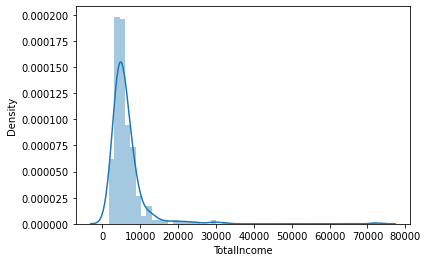

In [ ]:
sns.distplot(test["TotalIncome"])

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

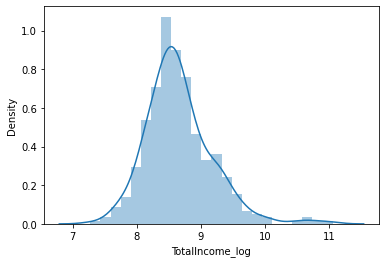

In [ ]:
test["TotalIncome_log"] = np.log(train["TotalIncome"])
sns.distplot(test["TotalIncome_log"])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

Now create the EMI feature.

In [ ]:
train["EMI"]=train["LoanAmount"]/train["Loan_Amount_Term"]
test["EMI"]=test["LoanAmount"]/test["Loan_Amount_Term"]

Have a look of train dataset "EMI"

In [ ]:
train[["EMI"]].head()

,EMI
0,0.355556
1,0.355556
2,0.183333
3,0.333333
4,0.391667


Again have a look of test dataset "EMI"

In [ ]:
test[["EMI"]].head()

,EMI
0,0.305556
1,0.350000
2,0.577778
3,0.277778
4,0.216667


Let’s check the distribution of EMI variable.

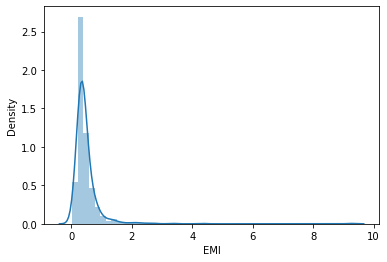

In [ ]:
sns.distplot(train["EMI"])

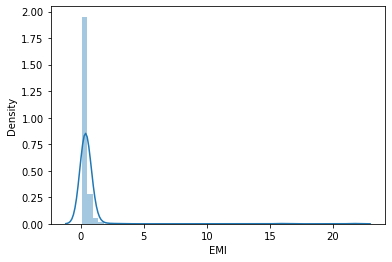

In [ ]:
sns.distplot(test["EMI"])

Let's create Balance Income feature now and check its distribution.

In [ ]:
train["Balance_Income"] = train["TotalIncome"]-train["EMI"]*1000 # To make the units equal we multiply with 1000
test["Balance_Income"] = test["TotalIncome"]-test["EMI"]

Have a look of train dataset "Balance Income"

In [ ]:
train[["Balance_Income"]].head()

,Balance_Income
0,5493.444444
1,5735.444444
2,2816.666667
3,4607.666667
4,5608.333333


Have a look of test dataset "Balance Income"

In [ ]:
test[["Balance_Income"]].head()

,Balance_Income
0,5719.694444
1,4575.650000
2,6799.422222
3,4885.722222
4,3275.783333


Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [ ]:
train=train.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y,4.852030,5849.0,8.674026,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N,4.852030,6091.0,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,4.189655,3000.0,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4.787492,4941.0,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y,4.948760,6000.0,8.699515,0.391667,5608.333333


In [ ]:
test = test.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban,4.852030,5720,8.674026,0.305556,5719.694444
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,4576,8.714568,0.350000,4575.650000
2,LP001031,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,6800,8.006368,0.577778,6799.422222
3,LP001035,Male,Yes,2,Graduate,No,1.0,Urban,4.787492,4886,8.505323,0.277778,4885.722222
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban,4.948760,3276,8.699515,0.216667,3275.783333


# Model Building :

After creating new features, we can continue the model building process. 

We will build the following models in this section.

i)Logistic Regression


Let’s prepare the data for feeding into the models.

Let's drop the "Loan_ID" variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

Drop "Loan_ID"

In [ ]:
train=train.drop("Loan_ID",axis=1)
test=test.drop("Loan_ID",axis=1)

After drop train dataset will look :

In [ ]:
train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,Y,4.852030,5849.0,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,N,4.852030,6091.0,8.714568,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,4.189655,3000.0,8.006368,0.183333,2816.666667


After drop test dataset will look :

In [ ]:
test.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,Yes,0,Graduate,No,1.0,Urban,4.852030,5720,8.674026,0.305556,5719.694444
1,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,4576,8.714568,0.350000,4575.650000
2,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,6800,8.006368,0.577778,6799.422222


We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

droping the target variable "Loan_Status"

In [ ]:
X=train.drop("Loan_Status",1)

In [ ]:
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,4.85203,5849.0,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,4.85203,6091.0,8.714568,0.355556,5735.444444


save the target variable "Loan_Status" in another dataset

In [ ]:
y=train[["Loan_Status"]]

In [ ]:
y.head(2)

,Loan_Status
0,Y
1,N


Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. 

Let us understand the process of dummies first:

Consider the “Gender” variable. It has two classes, Male and Female.

As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.

Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female),
one for each class, i.e. Male and Female.


Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X.head(3)

,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.852030,5849.0,8.674026,0.355556,5493.444444,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,1.0,4.852030,6091.0,8.714568,0.355556,5735.444444,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,1.0,4.189655,3000.0,8.006368,0.183333,2816.666667,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [ ]:
train.head(3)

,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,1.0,4.852030,5849.0,8.674026,0.355556,5493.444444,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1
1,1.0,4.852030,6091.0,8.714568,0.355556,5735.444444,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
2,1.0,4.189655,3000.0,8.006368,0.183333,2816.666667,0,1,0,1,...,0,1,0,0,1,0,0,1,0,1


In [ ]:
test.head(3)

,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.852030,5720,8.674026,0.305556,5719.694444,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,1.0,4.852030,4576,8.714568,0.350000,4575.650000,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2,1.0,4.189655,6800,8.006368,0.577778,6799.422222,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions?
One way of doing this is we can divide our train dataset into two parts:train and validation.
We can train the model on this train part and using that make predictions for the validation part.
In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).



We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)

The dataset has been divided into training and validation part.

70% data will use for train the model and rest of the 30% data will use for checking validation of the model. 

# Logistic Regression

Let's import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
logistic_model = LogisticRegression(random_state=1)

In [ ]:
logistic_model.fit(x_train,y_train)

LogisticRegression(random_state=1)

Let’s predict the Loan_Status for validation set

In [ ]:
pred_cv_logistic=logistic_model.predict(x_cv)

Now calculate how accurate our predictions are by calculating the accuracy.

In [ ]:
score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 

In [ ]:
score_logistic

75.67567567567568

So our predictions are almost 75% accurate, i.e. we have identified 75% of the loan status correctly for our logistic regression model.

Let’s make predictions for the test dataset.

In [ ]:
pred_test_logistic = logistic_model.predict(test)

In [ ]:
pred_test_logistic

array(['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y